# importing Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Reading the dataset 

In [32]:
df = pd.read_csv("D:\coading\diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# Show top 5 head 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# no. of rows and coloumns in this dataset 
df.shape 

(768, 9)

In [5]:
# getting the statistical measure of the data 
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [7]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
# seperating data and labels 
X = df.drop(columns = 'Outcome', axis = 1)
Y = df['Outcome']

In [9]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization - #to resize the distribution of values

#so that mean of the observed values is 0 and the standard deviation is 1

In [11]:
scaler  = StandardScaler()

In [12]:
scaler.fit(X)

StandardScaler()

In [13]:
sd_data = scaler.transform(X)

In [14]:
print(sd_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [15]:
X = sd_data
Y = df['Outcome']

In [16]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


train Test Split

#to estimate the performance of ML algorithms that are applicable for the model

#assign 2/3rd data points to the formmer and the remaining 1/3rd to the latter  

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)

#X = features = through which prediction is to be made 
    #Y = target

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [19]:
classifier = svm.SVC(kernel='linear')

In [20]:
# training the support vector maqchine classifier 
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [21]:
# accuracy score on the training data 
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [22]:
print("accuracy Score of the training data : ", training_data_accuracy)

accuracy Score of the training data :  0.7866449511400652


In [23]:
# accuracy on the test data 
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [24]:
print("accuracy Score of the test data : ", test_data_accuracy)

accuracy Score of the test data :  0.7727272727272727


Making a Predictive System

#scaler.transform  will transform the data such that its distribution will have a mean value 0 and standard deviation of 1 

In [25]:

input_data = (4,110,92,0,0,37.6,0.191,30)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the array as we are predicting for one instance 
input_data_reshaped =  input_data_as_numpy_array.reshape(1, -1)

# standardize the input data 
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')    

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
input_data = (10,168,74,0,0,38,0.537,34)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the array as we are predicting for one instance 
input_data_reshaped =  input_data_as_numpy_array.reshape(1, -1)

# standardize the input data 
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')    

[[ 1.82781311  1.4742667   0.25303625 -1.28821221 -0.69289057  0.76245745
   0.1966813   0.06459135]]
[1]
The person is diabetic


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
model = LogisticRegression() # create a model
model.fit(X_train,Y_train)

LogisticRegression()

In [28]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
print("accuracy Score of the training data : ", training_data_accuracy)

accuracy Score of the training data :  0.7850162866449512


In [30]:

input_data = (4,110,92,0,0,37.6,0.191,30)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the array as we are predicting for one instance 
input_data_reshaped =  input_data_as_numpy_array.reshape(1, -1)

# standardize the input data 
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic') 

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


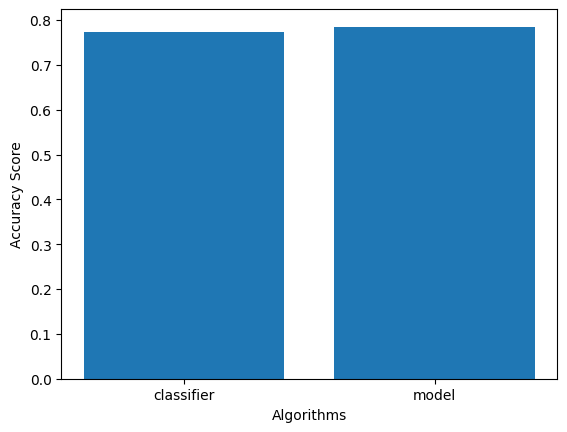

In [31]:
plt.bar(x=['classifier','model'],height = [test_data_accuracy,training_data_accuracy])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()